# CHEM 101.6 Project1

This is a Jupyter notebook for running and analyzing a Molecular Dynamics (MD) simulations of Butane using the OpenMM engine 


# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    OpenMM (https://openmm.org/)
2.    PyTraj (https://amber-md.github.io/pytraj/latest/index.html)
4.    Numpy (https://numpy.org/)
5.    Matplotlib (https://matplotlib.org/)
8.    AmberTools (https://ambermd.org/AmberTools.php)

Load libraries in conda enviroment:

conda install -c conda-forge openmm 

conda install -c conda-forge jupyterlab

conda install -c conda-forge mdtraj




In [1]:
import numpy as np
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
import openmm as mm
from openmm import app
from openmm import unit
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import pandas as pd
from statistics import mean, stdev
from matplotlib import colors
import mdtraj as md
import seaborn as sns


In [3]:
workdir='/Users/jackmcmahon/Development/CHEM 101.6/Exercise1'
datadir='/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/data/'
outdir='/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/outdir/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.xml'

#if not os.path.exists(workDir):
#    os.makedirs(workDir)
    
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/data/butane.pdb
/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/data/butane.gaff2.xml


In [4]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692127868 kJ/mol
Potential energy after minimization is 5.2952718619056025 kJ/mol


In [5]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,31.906173347271885,287.5125541962056
2000,40.58443812476286,422.25470821219795


In [6]:
os.path.join(workdir, "butane_sim.dcd")

'/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/butane_sim.dcd'

In [7]:
# import time as time

# print('Running Production...')

# # Begin timer
# tinit=time.time()

# # Clear simulation reporters
# simulation.reporters.clear()

# # Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# # output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
# simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
#     step=True, time=True, potentialEnergy=True, temperature=True, 
#     speed=True, separator=','))

# # write out a trajectory (i.e., coordinates vs. time) to a DCD
# # file every 100 steps - 0.2 ps
# simulation.reporters.append(app.XTCReporter(os.path.join(workdir, "butane_sim.xtc"),100))
                
# # run the simulation for 1.0x10^7 steps - 20 ns
# simulation.step(10000000)

# # End timer
# tfinal=time.time()
# print('Done!')
# print('Time required for simulation:', tfinal-tinit, 'seconds')

In [8]:
import mdtraj as md
traj = md.load(os.path.join(workdir, "butane_sim.dcd"), top=PDB_file_name)
traj


<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x10d1aadd0>

In [9]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

In [10]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x158c8ac50>

In [11]:
C_sel=top.select("type C")
print(C_sel)
top.atom(10)
for atom in C_sel:
    print(atom,top.atom(atom))

H_sel=top.select("type H")
for atom in H_sel:
    print(atom,top.atom(atom))

[ 0  4  7 10]
0 NBU1-C1
4 NBU1-C2
7 NBU1-C3
10 NBU1-C4
1 NBU1-H11
2 NBU1-H12
3 NBU1-H13
5 NBU1-H21
6 NBU1-H22
8 NBU1-H31
9 NBU1-H32
11 NBU1-H41
12 NBU1-H42
13 NBU1-H43


In [12]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))

[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4


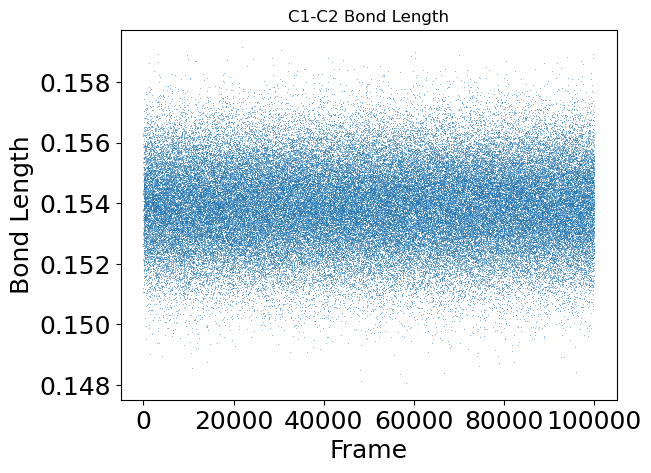

In [13]:
#Compute Some Distances and plot the time course
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C1C2bondlength,linewidth=1)
plt.plot(C1C2bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
#plt.xlim([0,1000])

plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

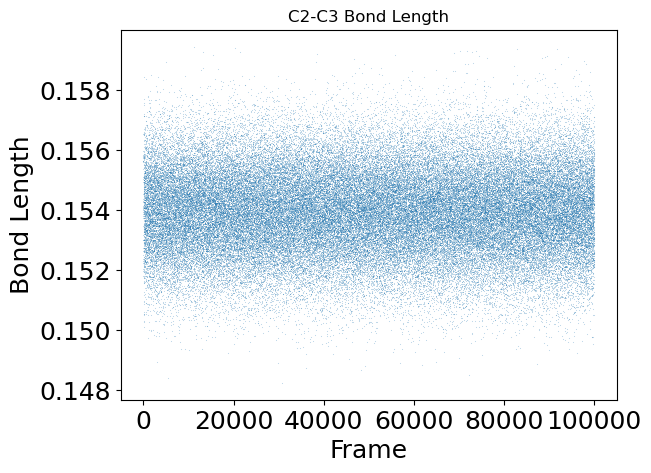

In [14]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C2C3bondlength)
plt.plot(C2C3bondlength,linewidth=0,marker='x',markersize=.05)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

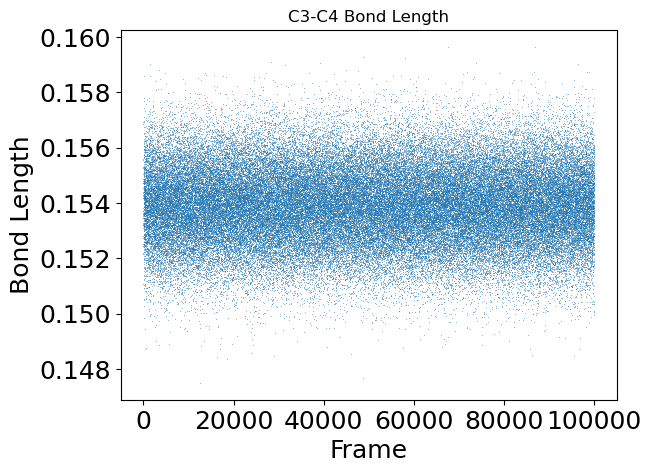

In [15]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C3C4bondlength)
plt.plot(C3C4bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

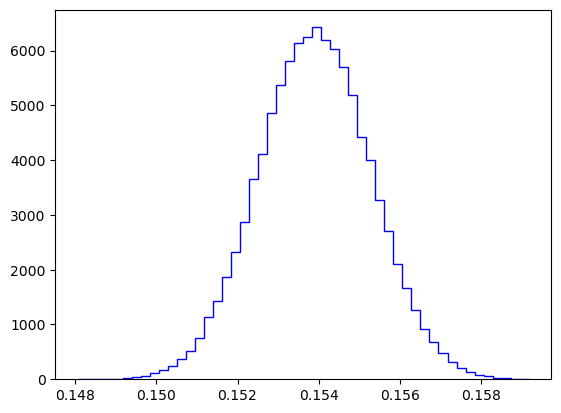

In [16]:
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.show()

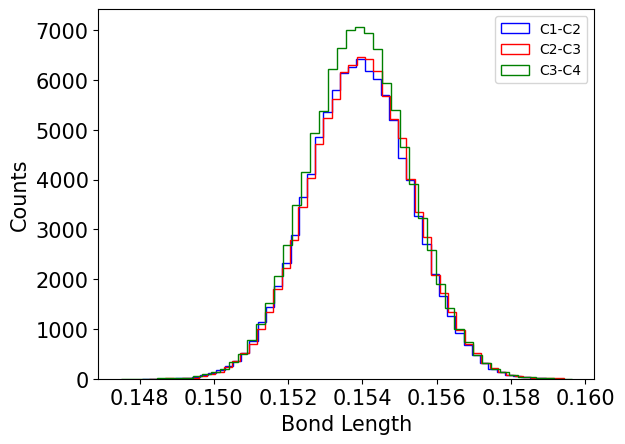

In [17]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()

Lets Write Functions to Calculate the Variance ($\sigma^2$) and Standard Deviation ($\sigma$)

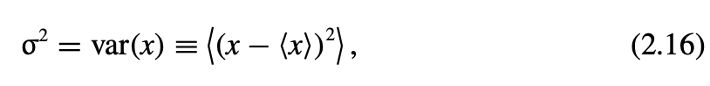

In [18]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######


In [19]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)

print("C1-C2 variance:",C1C2var,"C1-C2 standard deviation:",C1C2std)
print("C2-C3 variance:",C2C3var,"C1-C2 standard deviation:",C2C3std)
print("C3-C4 variance:",C2C3var,"C1-C2 standard deviation:",C3C4std)

C1-C2 variance: 1.8896328e-06 C1-C2 standard deviation: 0.0013746391573392417
C2-C3 variance: 1.9033658e-06 C1-C2 standard deviation: 0.0013796252541275833
C3-C4 variance: 1.9033658e-06 C1-C2 standard deviation: 0.0013722549112839327


In [20]:
#Lets Check Our Answers with the Built In Numpy Libraries
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15390237 variance: 1.8896328e-06 std-dev: 0.0013746391
C2-C3 average: 0.15395042 variance: 1.9033658e-06 std-dev: 0.0013796253
C3-C4 average: 0.1539007 variance: 1.8830835e-06 std-dev: 0.0013722549


***Class Activity: Lets Check if These Bond Lengths Are Correlated and Calculate the Coerrleation Coefficents***

***First Calculate a Best Fit Line****

We can do this using the np.polyfit function:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

***Now Calculate the Perason Correlation Coefficient***
We can use numpy to calculate the correlation coeffient 

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

This function works for n-arrays, so it will report correlation coefficient matrix, and we need to select our coefficient of interest, which in our case is the off diagnol  


In [21]:
#Switch to a 1D array 
np.shape(C1C2bondlength[:,0])

(100000,)

Line Parameters: [0.50013428 0.07697493]


/var/folders/d8/ljs_0tq104s4vglq15j0zhnr0000gn/T/ipykernel_55137/1769237437.py:9: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)


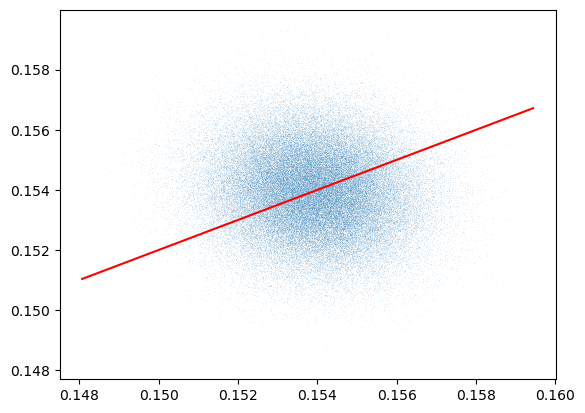

/var/folders/d8/ljs_0tq104s4vglq15j0zhnr0000gn/T/ipykernel_55137/1769237437.py:22: RankWarning: Polyfit may be poorly conditioned
  line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)


r2: -0.0912904587833244
Line Parameters: [0.4999746  0.07695035]


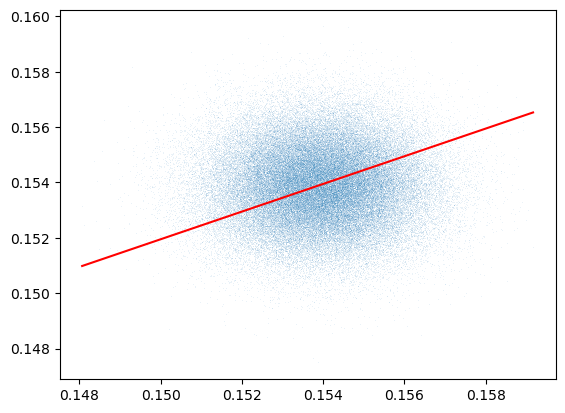

r2: 0.0027398199080115046


In [22]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',s=0.1,linewidth=0.05)

#######SOLUTION###########


line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

<Figure size 640x480 with 0 Axes>

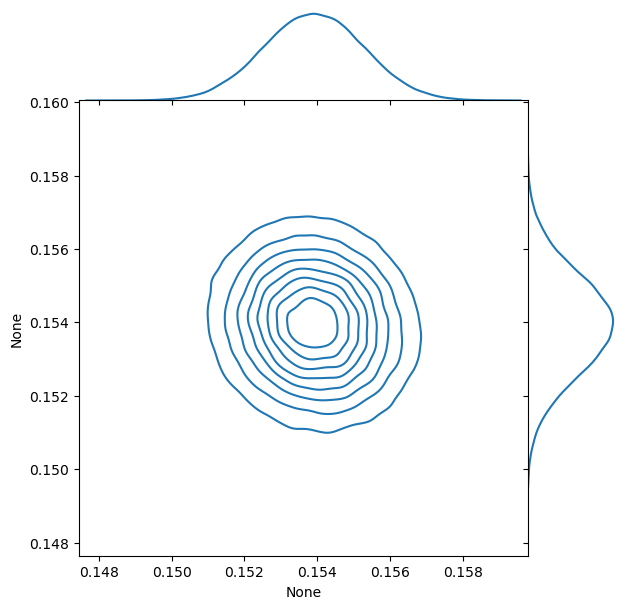

In [23]:
import seaborn as sns
plt.clf()
sns.jointplot(x=C1C2bondlength[:,0],y=C2C3bondlength[:,0],kind='kde',space=0,thresh=0)

In [24]:
# import seaborn as sns
# plt.clf()
# sns.jointplot(x=C1C2bondlength[:,0],y=C2C3bondlength[:,0],kind='reg',scatter_kws={'s':0.001})

**WEEK 1 Homework Question:  Why does one pair of these bonds appear slightly more correlated than the other?**

HERE IS MY ANSWER: The C1-C2 and C2-C3 bonds are more correlated because they are next to each other. It makes sense that they have a negative correlation, because an increase in the C1-C2 bond length may influence a contraction in the C2-C3 bond. This dynamic is less present in the C1-C2 and C3-C4 bonds because they are not right next to each other.

***Class Activity*** 

***Lets write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

Lets Turn these histograms into a probability densities and then fit them to a
normal (Gaussian) Distribution

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

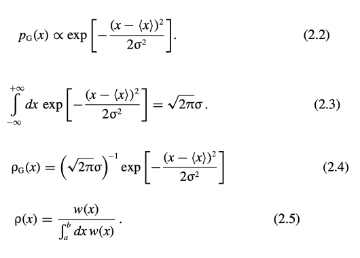
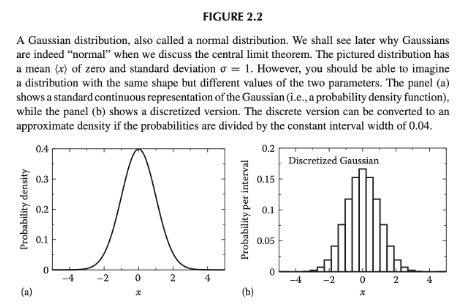

In [25]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

####SOLUTION####

#First we convery our histogram into bin centers and probabilities
#isntead of bin edges and counts:

counts, edges = np.histogram(C1C2bondlength,bins=20,range=[0.147,0.160])
print(counts,edges)
centers = edges[:-1] + np.diff(edges)/2
density=counts/(np.sum(counts))

### THIS IS WHAT YOU WANT TO TURN INTO A FUNCTION FOR HOMEWORK ####

###Now we define a gaussian function that we'll fit to our probability densities
def gauss(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit

def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss,x,y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]


C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)

plt.plot(centers,density,'o',label='C1-C2')
plt.plot(centers,C1C2_fit,'-',label='fit C1-C2')
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()

#C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)


[    0     2    11    68   312  1043  2946  6418 11493 16316 18372 17190
 12832  7499  3589  1389   403    98    19     0] [0.147   0.14765 0.1483  0.14895 0.1496  0.15025 0.1509  0.15155 0.1522
 0.15285 0.1535  0.15415 0.1548  0.15545 0.1561  0.15675 0.1574  0.15805
 0.1587  0.15935 0.16   ]
a: 0.18614742380474922 x_0: 0.15390436696856355 fit_sigma: 0.0013950701840106264


***Homework Porblem 1:  Can you write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

a: 0.18614742380474922 x_0: 0.15390436696856355 fit_sigma: 0.0013950701840106264
a: 0.18592670894598262 x_0: 0.15395096720148876 fit_sigma: -0.0013955256737733005
a: 0.1868959145836601 x_0: 0.15389627105692102 fit_sigma: 0.0013886899697728014


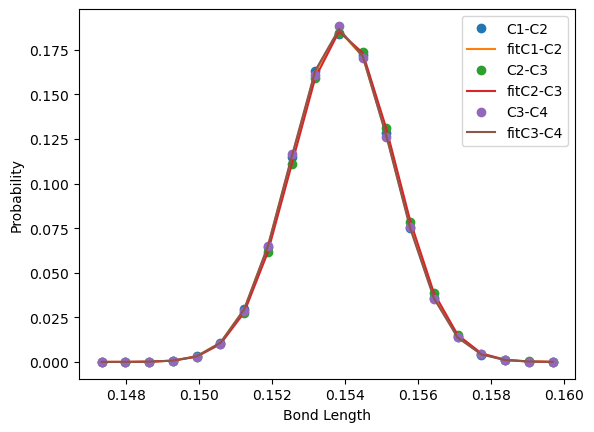

In [36]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####HOMEWORK SOLUTION####
def histogram_bincenters(bond, bins=20, low=0.147, high=0.160):
  counts, edges = np.histogram(bond,bins=bins,range=[low,high])
  # print(counts,edges)
  centers = edges[:-1] + np.diff(edges)/2
  density=counts/(np.sum(counts))
  return centers,density 

def gauss(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))
  
def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss,x,y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]

#USE THE FUNCTION TO ITERATE OVER ALL CC BONDS, plot the densities and the fits 
bonds = [C1C2bondlength, C2C3bondlength, C3C4bondlength]
labels = ['C1-C2', 'C2-C3', 'C3-C4']
densities_array = []
centers_array = []

for i in range(len(bonds)):
  centers,density = histogram_bincenters(bonds[i], 20, 0.147, 0.160)
  centers_array.append(centers)
  densities_array.append(density)
  fit, fit_params =fit_gauss(centers,density)
  plt.plot(centers,density,'o',label=labels[i])
  plt.plot(centers,fit,'-',label='fit' + labels[i])
  
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()

**Week 1 Homework Problem #2: convert these probability distributions to culmulative distribution functions**



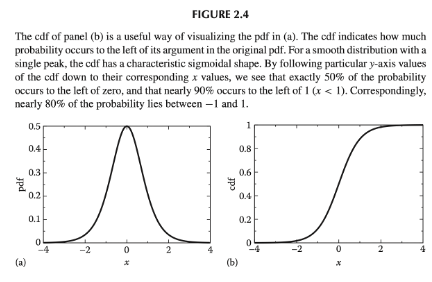

[0.0000e+00 2.0000e-05 1.3000e-04 8.1000e-04 3.9300e-03 1.4360e-02
 4.3820e-02 1.0800e-01 2.2293e-01 3.8609e-01 5.6981e-01 7.4171e-01
 8.7003e-01 9.4502e-01 9.8091e-01 9.9480e-01 9.9883e-01 9.9981e-01
 1.0000e+00 1.0000e+00]
[0.0000e+00 1.0000e-05 1.1000e-04 5.2000e-04 3.2400e-03 1.3470e-02
 4.0950e-02 1.0241e-01 2.1339e-01 3.7227e-01 5.5672e-01 7.3066e-01
 8.6175e-01 9.4018e-01 9.7860e-01 9.9397e-01 9.9839e-01 9.9963e-01
 9.9996e-01 1.0000e+00]
[1.0000e-05 2.0000e-05 2.5000e-04 8.9000e-04 3.8600e-03 1.3800e-02
 4.2360e-02 1.0746e-01 2.2381e-01 3.8492e-01 5.7327e-01 7.4389e-01
 8.6985e-01 9.4554e-01 9.8074e-01 9.9446e-01 9.9884e-01 9.9982e-01
 9.9998e-01 1.0000e+00]


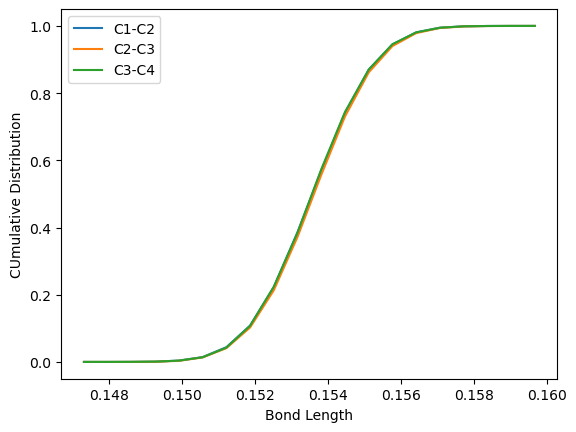

In [27]:
###WEEK 1 HOMEWORK#### 

####HOMEWORK SOLUTION####

#TRY THIS FUNCTION:
#https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
#ADD CODE FOR CDFs HERE#

cumulative_array = []
for i in range(len(bonds)):
  cumulative =  np.cumsum(densities_array[i])
  print(cumulative)
  cumulative_array.append(cumulative)
  plt.plot(centers_array[i],cumulative_array[i],'-',label=labels[i])
  
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('CUmulative Distribution')
plt.show()
  
  


**WEEK 1 Homework Problem #3: Lets draw some random frames from our trajectory (for example 10,100,1000,10000),  calculate the probability distribution functions for 4 of these random samples, and fit  gaussians to these probability distirbution functions for 1) A Bond Angle 3) A Dihedral Angle.  Why is the Gaussian fit for a dihedral so poor with a large sample? ***


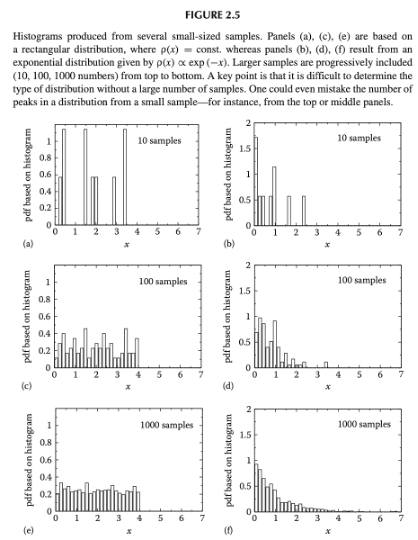

(100000, 2)
[[1.9515724 1.9851509]
 [1.8890599 2.0432367]
 [1.9106187 1.9172046]
 ...
 [1.9475054 2.0576303]
 [1.9642272 1.9571799]
 [1.9984161 1.9362751]]


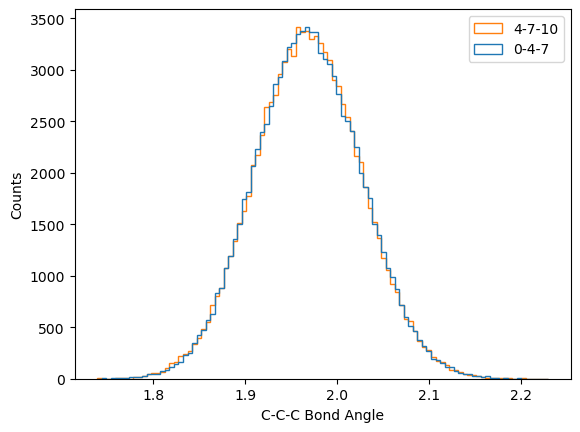

[[ 2.7206235]
 [ 3.0009696]
 [-2.932695 ]
 ...
 [ 2.9747062]
 [ 2.834821 ]
 [-2.6911452]]
[[ 155.88023]
 [ 171.94289]
 [-168.03104]
 ...
 [ 170.4381 ]
 [ 162.42326]
 [-154.19125]]


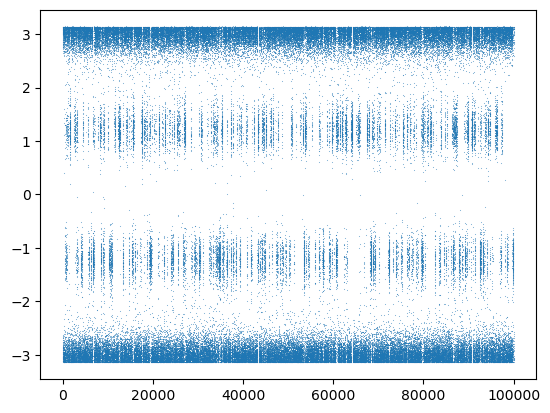

In [28]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
print(np.shape(ang))
print(ang)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1,linewidth=0,marker='x',markersize=.1)
plt.plot(ang2,linewidth=0,marker='x',markersize=.1)
plt.clf()

plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle')
plt.ylabel('Counts')
plt.show()
#plt.scatter(ang1,marker='o',s=0.1)

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
print(CCCC_torsion)
print(np.rad2deg(CCCC_torsion))

plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

/var/folders/d8/ljs_0tq104s4vglq15j0zhnr0000gn/T/ipykernel_55137/2319817681.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, covariance = curve_fit(gauss,x,y)


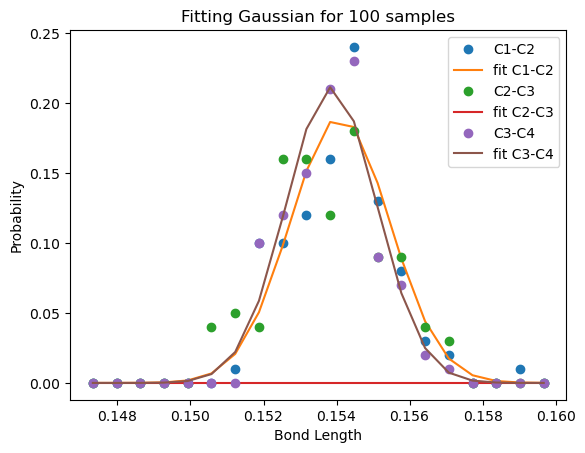

<Figure size 640x480 with 0 Axes>

In [35]:
#ADD CODE FOR FITTING GUASSIAN FUNCTIONS TO RANDOM SAMPLES  HERE#
#Draw 10,100,1000 random samples of a bond angle - FIT THEM TO BOND ANGLE

#Draw 10,100,1000,10000 random samples of a dihedral angle - FIT THEM TO A GAUSSIAN - WHY IS THIS FIT SO POOR?

sample_amounts = [10,100,1000]
for i in range(len(sample_amounts)):
  rands=np.random.randint(100000, size=sample_amounts[i])
  C1C2bond=C1C2bondlength[:,0]
  C2C3bond=C2C3bondlength[:,0]
  C3C4bond=C3C4bondlength[:,0]
  sampled_bonds = [C1C2bond[rands], C2C3bond[rands], C3C4bond[rands]]
  labels = ['C1-C2', 'C2-C3', 'C3-C4']
  
  
  for j in range(len(sampled_bonds)):
    centers,density = histogram_bincenters(sampled_bonds[j], 20, 0.147, 0.160)
    centers_array.append(centers)
    densities_array.append(density)
    fit, fit_params =fit_gauss(centers,density)
    plt.plot(centers,density,'o',label=labels[j])
    plt.plot(centers,fit,'-',label='fit ' + labels[j])
    plt.title("Fitting Gaussian for " + str(sample_amounts[i]) + " samples")
  plt.legend()
  plt.xlabel('Bond Length')
  plt.ylabel('Probability')
  plt.show()
  plt.clf()



a: 0.4128087134242283 x_0: 1.9666933502224244 fit_sigma: -0.01376487251848978
a: 0.11427567705067114 x_0: 1.9747226171874572 fit_sigma: 0.07080398290276606


a: 0.13906409626913807 x_0: 1.9624413665094869 fit_sigma: 0.05878204613942769
a: 0.11852291959413462 x_0: 1.9697413659102985 fit_sigma: 0.06908921889727801


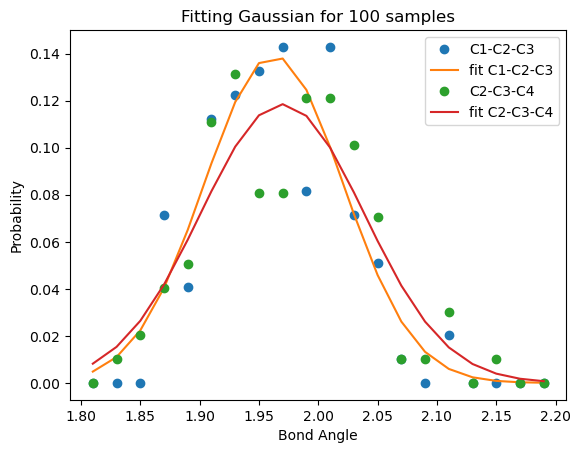

a: 0.1388029756208965 x_0: 1.9693717392615313 fit_sigma: 0.057750567738074327
a: 0.13750634192754796 x_0: 1.963918333596673 fit_sigma: 0.05816942929698021


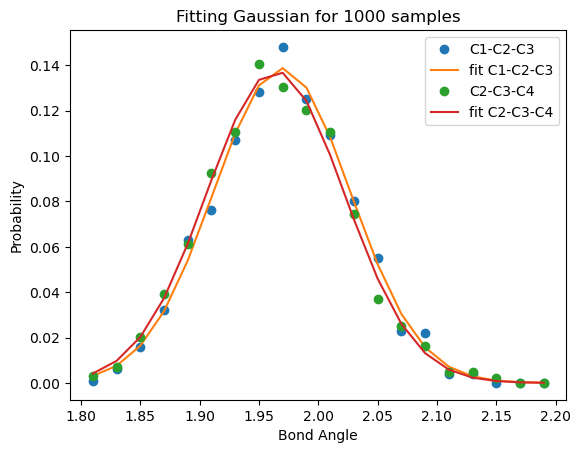

a: 4.405840149072351 x_0: 3.2874660630583064 fit_sigma: -0.11862149669738824


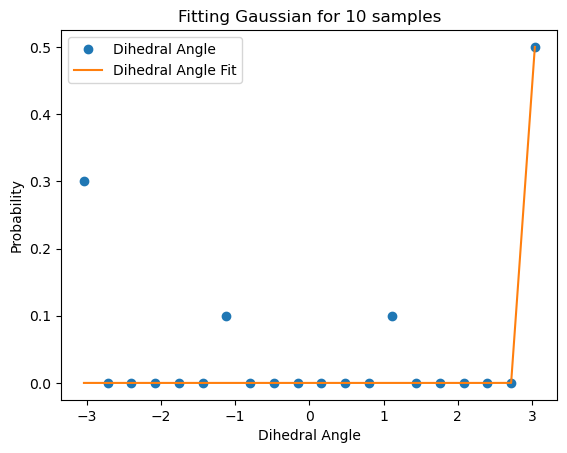

a: 0.4370603599745544 x_0: 2.952730448816503 fit_sigma: -0.13090840885292468


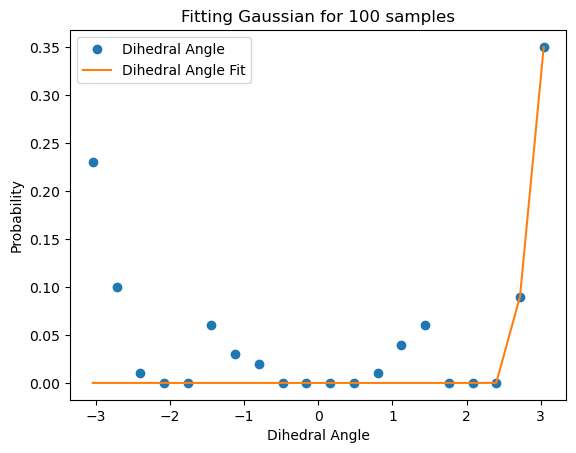

a: 0.33089589213892073 x_0: -3.1306343827018295 fit_sigma: -0.26430784759950693


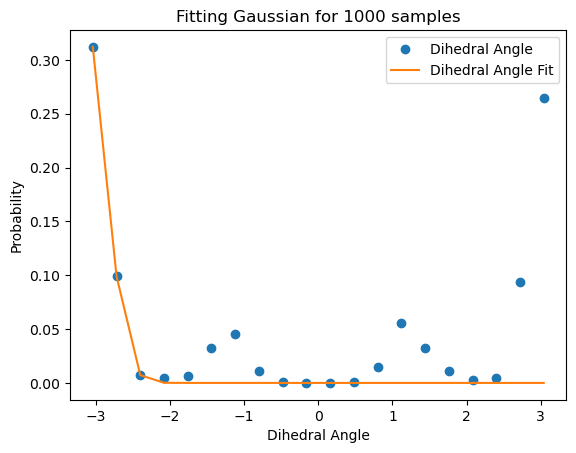

<Figure size 640x480 with 0 Axes>

In [51]:
#Bond angle
sample_amounts = [10,100,1000]
for i in range(len(sample_amounts)):
  rands=np.random.randint(100000, size=sample_amounts[i])
  sampled_angles = [ang1[rands], ang2[rands]]
  labels = ["C1-C2-C3","C2-C3-C4"]
  
  ###Now we define a gaussian function that we'll fit to our probability densities
  def gauss1(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

  #### Now we define a function to fit the gaussian with curve fit

  def fit_gauss1(x,y):
    parameters, covariance = curve_fit(gauss,x,y, bounds=([-10,0,-10],[1,4,1]))
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]
  
  for j in range(len(sampled_angles)):
    centers,density = histogram_bincenters(sampled_angles[j], 20, 1.8, 2.2)
    centers_array.append(centers)
    densities_array.append(density)
    
    fit, fit_params = fit_gauss1(centers,density)
    plt.plot(centers,density,'o',label=labels[j])
    plt.plot(centers,fit,'-',label='fit ' + labels[j])
    plt.title("Fitting Gaussian for " + str(sample_amounts[i]) + " samples")
  plt.legend()
  plt.xlabel('Bond Angle')
  plt.ylabel('Probability')
  plt.show()
  plt.clf()
  

#Dihedral
sample_amounts = [10,100,1000]
for i in range(len(sample_amounts)):
  rands=np.random.randint(100000, size=sample_amounts[i])
  sampled_torsion = CCCC_torsion[rands]

  centers,density = histogram_bincenters(sampled_torsion, 20, -3.2, 3.2)
  centers_array.append(centers)
  densities_array.append(density)
  fit, fit_params =fit_gauss(centers,density)
  plt.plot(centers,density,'o',label="Dihedral Angle")
  plt.plot(centers,fit,'-',label="Dihedral Angle Fit")
  plt.title("Fitting Gaussian for " + str(sample_amounts[i]) + " samples")
  plt.legend()
  plt.xlabel('Dihedral Angle')
  plt.ylabel('Probability')
  plt.show()
  plt.clf()

MY ANSWER TO 3: The guassian fit to the dihedral is poor even with 1000 samples because the dihedral angles do not follow a normal distribution.

In [52]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

**Class Activity: Lets Compute the 2 C-C-C Bond Anlges and C-C-C-C Dihedral Angle ***

Plot their histograms.  Find a nice way to visualize the C-C-C-C dihedral angle 

(100000, 2)
[[1.9515724 1.9851509]
 [1.8890599 2.0432367]
 [1.9106187 1.9172046]
 ...
 [1.9475054 2.0576303]
 [1.9642272 1.9571799]
 [1.9984161 1.9362751]]


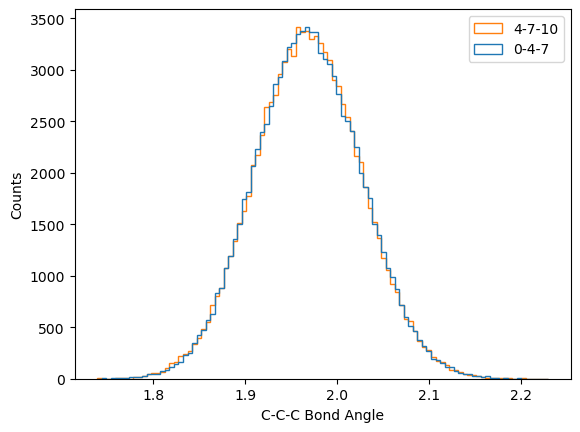

[[ 2.7206235]
 [ 3.0009696]
 [-2.932695 ]
 ...
 [ 2.9747062]
 [ 2.834821 ]
 [-2.6911452]]
[[ 155.88023]
 [ 171.94289]
 [-168.03104]
 ...
 [ 170.4381 ]
 [ 162.42326]
 [-154.19125]]


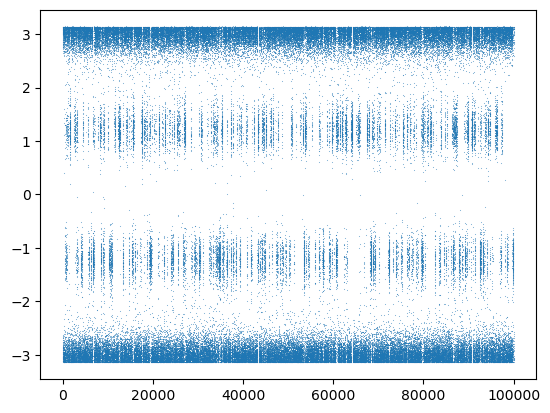

In [53]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
print(np.shape(ang))
print(ang)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1,linewidth=0,marker='x',markersize=.1)
plt.plot(ang2,linewidth=0,marker='x',markersize=.1)
plt.clf()

plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle')
plt.ylabel('Counts')
plt.show()
#plt.scatter(ang1,marker='o',s=0.1)

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
print(CCCC_torsion)
print(np.rad2deg(CCCC_torsion))

plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

(0.0, 1000.0)

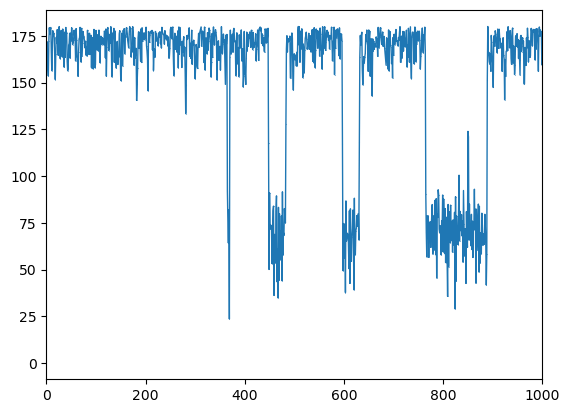

In [54]:
#print(np.where(CCCC_torsion<=0))
CCCC_tor_offset=np.rad2deg(CCCC_torsion)
#print(CCCC_tor_offset)
#for i in range(0,len(CCCC_tor_offset)):
#    if(CCCC_tor_offset[i]<0):
#        CCCC_tor_offset[i]+=360
        
plt.plot(np.abs(CCCC_tor_offset),marker='x',markersize=.1,linewidth=1)
plt.xlim([0,1000])

***Week 1 Homework Question:  What is the probability of being found in the higher free energy C-C-C-C dihedral state?*****

In [55]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state?####

#### Calculate Here #####
#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe=CCCC_torsion[:,0]
a=np.where(CCCC_dihe<0)
# print(a)
# print(CCCC_dihe[a])

b=np.where(CCCC_dihe>-2)
# print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<2) & (CCCC_dihe>-2))
# print(c)

c1=np.where((CCCC_dihe<2) & (CCCC_dihe>0))
# print(c)

#Probability of being between 2 and -2 radians:
print("Probability of being in first higher energy gauche state:", len(CCCC_dihe[c1])/len(CCCC_dihe))

c2=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
# print(c)

#Probability of being between 2 and -2 radians:
print("Probability of being in second higher energy gauche state:", len(CCCC_dihe[c2])/len(CCCC_dihe))

#Probability of being between 2 and -2 radians:
print("Probability of being in higher energy gauche state:", len(CCCC_dihe[c])/len(CCCC_dihe))




Probability of being in first higher energy gauche state: 0.10034
Probability of being in second higher energy gauche state: 0.09574
Probability of being in higher energy gauche state: 0.19608


ANSWER: Around 19.6% probability of dihedral being in higher energy state

**Class Activity: Are The Bond Angles and Dihedral Angle Correlated?**

r2: 0.00888520502494576


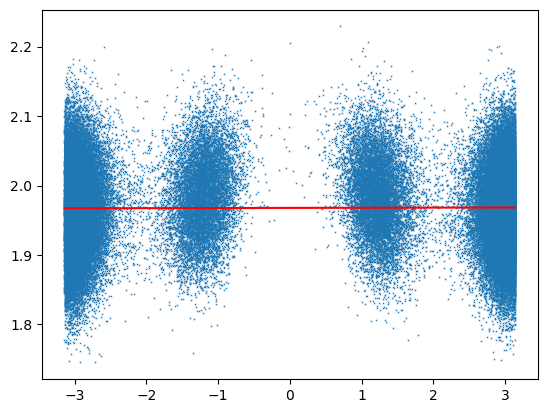

In [56]:
#### COMPLETE IN-CLASS ACTIVITY HERE #####
#Are the bond angle and dihedral correlated?
CCCC_dihe

plt.scatter(CCCC_dihe,ang1,marker='x',s=0.1)
r=np.corrcoef(CCCC_dihe,ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_dihe,ang1,1)
line_fit
x=np.linspace(min(CCCC_dihe),max(CCCC_dihe),20)
y = line_fit[1]+x*line_fit[0]
plt.plot(x,y,c='r',label='best fit line')
plt.show()
##### ADD FANCY SEABORN PLOT HERE ######
# sns.jointplot(x=CCCC_dihe,y=ang1,kind='kde',space=0,thresh=0)

**Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?** 



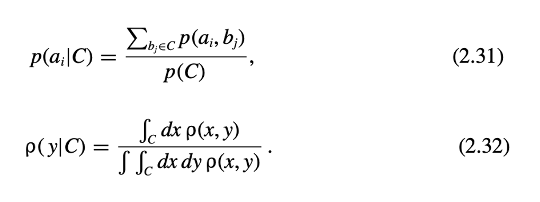

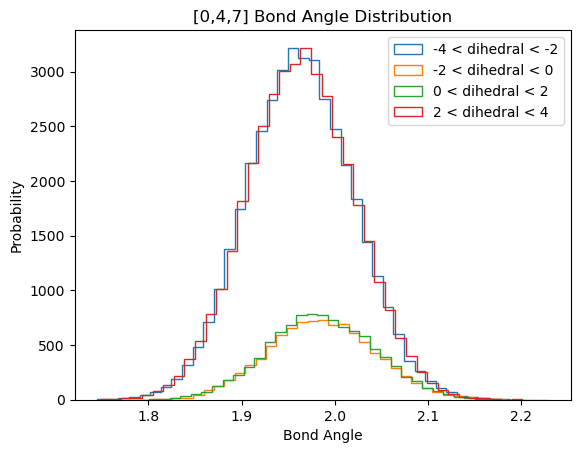

<Figure size 640x480 with 0 Axes>

In [ ]:
#Homework problem 3 Solution ##

#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
region=np.where((CCCC_dihe<-2) & (CCCC_dihe>-4))
selected_dihe = CCCC_dihe[region]
selected_ang = ang1[region]

plt.hist(selected_ang,bins=40,histtype='step',label=['-4 < dihedral < -2'])


region=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
selected_dihe = CCCC_dihe[region]
selected_ang = ang1[region]

plt.hist(selected_ang,bins=40,histtype='step',label=['-2 < dihedral < 0'])
region=np.where((CCCC_dihe<2) & (CCCC_dihe>0))
selected_dihe = CCCC_dihe[region]
selected_ang = ang1[region]

plt.hist(selected_ang,bins=40,histtype='step',label=['0 < dihedral < 2'])

region=np.where((CCCC_dihe<4) & (CCCC_dihe>2))
selected_dihe = CCCC_dihe[region]
selected_ang = ang1[region]

plt.hist(selected_ang,bins=40,histtype='step',label=['2 < dihedral < 4'])
plt.title("[0,4,7] Bond Angle Distribution" )
plt.legend()
plt.xlabel('Bond Angle')
plt.ylabel('Probability')
plt.show()
plt.clf()

In [ ]:
#Will Walk through example of Autocorrelation Function (ACF) calculation here#
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)
    
print(ang1)
print(ang1[1:])
print(ang1[:-1])

[1.9515724 1.8890599 1.9106187 ... 1.9475054 1.9642272 1.9984161]
[1.8890599 1.9106187 1.9444958 ... 1.9475054 1.9642272 1.9984161]
[1.9515724 1.8890599 1.9106187 ... 1.8702377 1.9475054 1.9642272]


**Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals**

https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


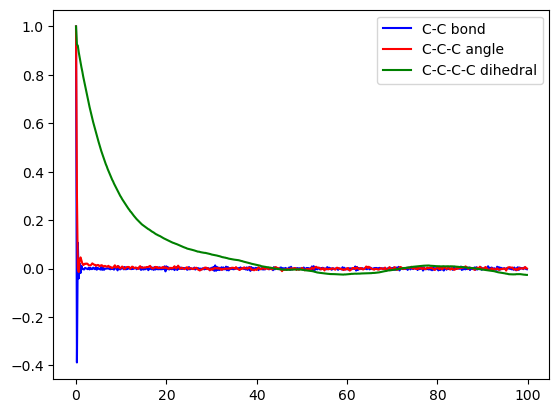

In [ ]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

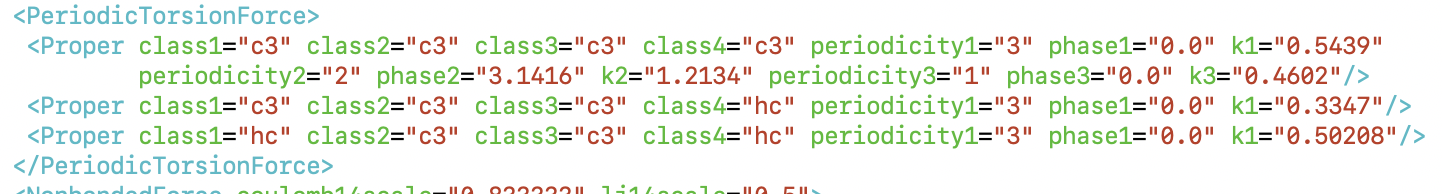

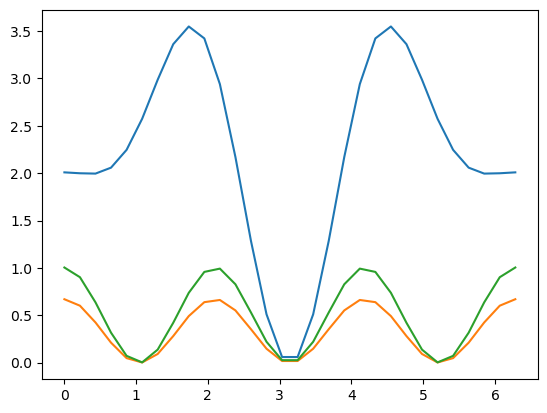

In [ ]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms

#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e)
plt.plot(rad_ang,CCCH_e)
plt.plot(rad_ang,HCCH_e)

In [ ]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

In [ ]:
#Lets Consider Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Central Torsion: 
#C-C-C-C -[10,7,4,0]
#H-C-C-H; [8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6]  
#H-C-C-H; [6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3]
#H-C-C-H; [13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
#C-C-C-H -[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

CCCC_index=[10,7,4,0]
HCCH_indices=[[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]]
CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])


In [ ]:
print(HCCH_indices)
print(HCCH_torsions)

[[8, 7, 4, 5], [8, 7, 4, 6], [9, 7, 4, 5], [9, 7, 4, 6], [6, 4, 0, 1], [6, 4, 0, 2], [6, 4, 0, 3], [5, 4, 0, 1], [5, 4, 0, 2], [5, 4, 0, 3], [13, 10, 7, 8], [12, 10, 7, 8], [11, 10, 7, 8], [13, 10, 7, 9], [12, 10, 7, 9], [11, 10, 7, 9]]
[[ 2.9569926  -1.4643238   0.9966258  ...  2.7499986  -1.2654586
   0.6567953 ]
 [ 2.7266202  -1.4786515   0.7764353  ... -3.048214   -0.7269308
   1.2796307 ]
 [-2.8419778  -0.81058633  1.3218518  ...  2.900986   -1.2872385
   0.8815264 ]
 ...
 [ 2.9980593  -1.3247584   1.081996   ...  2.8369935  -1.2348101
   0.7600018 ]
 [ 2.8279827  -1.3266178   0.8331294  ...  2.89018    -1.1421276
   0.8362037 ]
 [-2.9247875  -0.6954296   1.3644342  ...  2.9426866  -1.1171483
   0.7545638 ]]


**Homework Problem #5: Many of These Correlations will be highly Correlated Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships**

For a Torsion Angle Pair that is highly correlated, can you find a relatively constant offset?  

For a Torsion Angle Pair that are less correlated, how can you interpret their scatter plots?

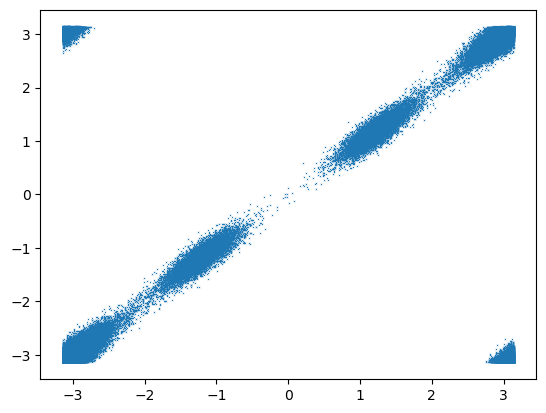

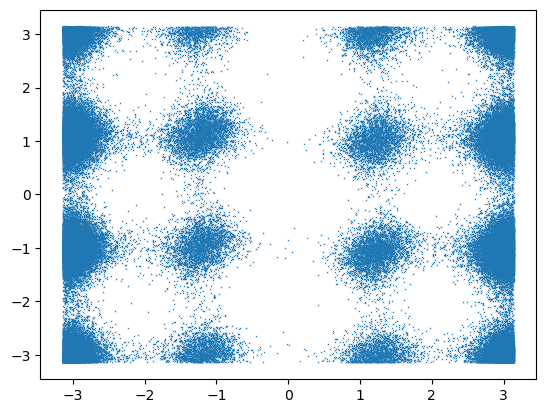

<Figure size 640x480 with 0 Axes>

In [ ]:
####WEEK 1 Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Perhaps Consider CCCC vs. [8,7,4,5]
plt.scatter(CCCC_torsion,HCCH_torsions[:,0],marker='x',s=0.05)
plt.show()
plt.clf()

#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Perhaps Consider CCCC vs. [12,10,7,9]?
plt.scatter(CCCC_torsion,HCCH_torsions[:,12],marker='x',s=0.05)
plt.show()
plt.clf()


Question 5 Discussion: 

CCCC vs. [8,7,4,5] appeared very correlated with a consistent offset that was either 0, +3, or -3 in the plot. This implied that the offset was pi radians between the two torsions, or 180 degrees.

CCCC vs. [12,10,7,9] appeared uncorrelated. The multiple centers for the distrbution of the torsions implies that the CCCC torsion does not affect the [12,10,7,9]. Those multiple centers are the most favorable orientations for each of the torsions.

**Homework Problem #6: SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT**

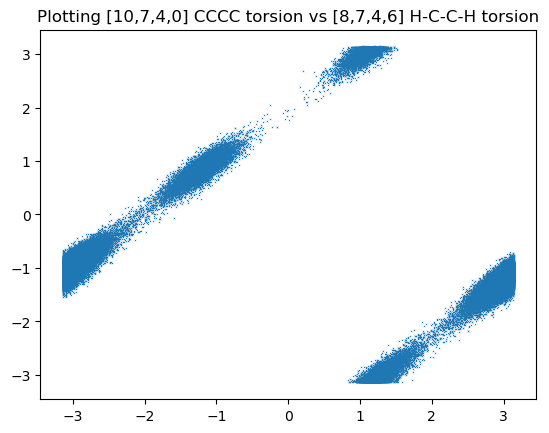

Sin of Offset: -0.88660794


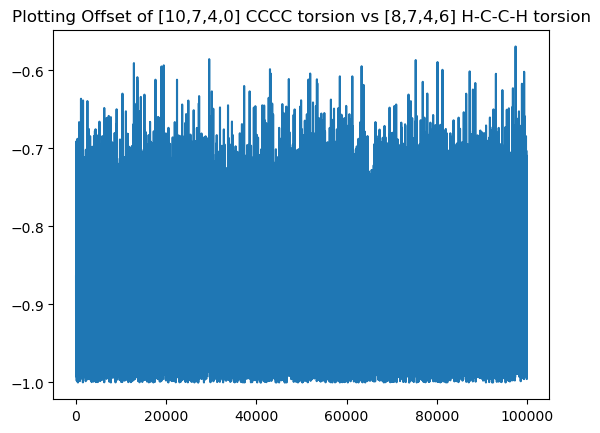

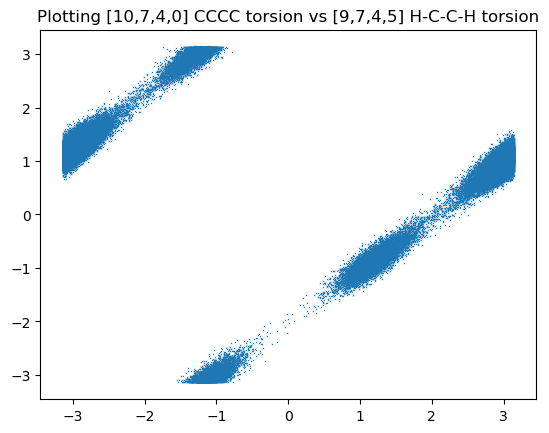

Sin of Offset: 0.88630724


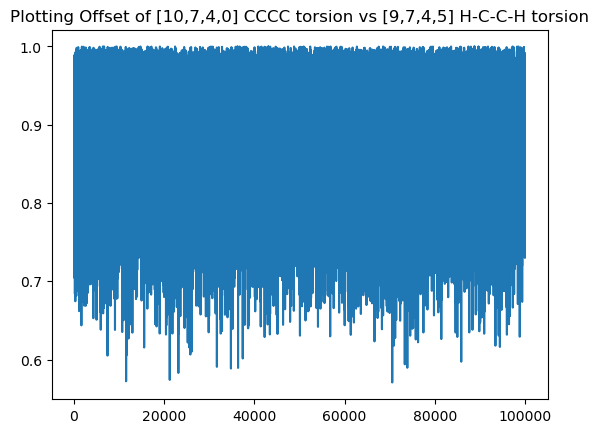

<Figure size 640x480 with 0 Axes>

In [ ]:

#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT

plt.scatter(CCCC_torsion,HCCH_torsions[:,1],marker='x',s=0.05)
plt.title("Plotting [10,7,4,0] CCCC torsion vs [8,7,4,6] H-C-C-H torsion")
plt.show()
plt.clf()

offset = CCCC_torsion[:,0] - HCCH_torsions[:,1]
print("Sin of Offset:", np.mean(np.sin(offset)))
plt.plot(np.sin(offset))
plt.title("Plotting Offset of [10,7,4,0] CCCC torsion vs [8,7,4,6] H-C-C-H torsion")
plt.show()
plt.clf()
# offset is -pi/3 radians

plt.scatter(CCCC_torsion,HCCH_torsions[:,2],marker='x',s=0.05)
plt.title("Plotting [10,7,4,0] CCCC torsion vs [9,7,4,5] H-C-C-H torsion")
plt.show()
plt.clf()

offset = CCCC_torsion[:,0] - HCCH_torsions[:,2]
print("Sin of Offset:", np.mean(np.sin(offset)))
plt.title("Plotting Offset of [10,7,4,0] CCCC torsion vs [9,7,4,5] H-C-C-H torsion")
plt.plot(np.sin(offset))
plt.show()
plt.clf()
# offset is pi/3 radians


***WEEK 2 Homework Problem #1: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution***


Lets try to lower the dihedral barriers for torsion angles of 1 radian (~60 degrees)
This means we need to to come up with a torsion potential, potentially by using multiple terms with different phases, to equalize the free energy of each C-C-C-C torsion basin (increasing the free energy at $\pi$ and lowering 
free energy at $\pi$/3

Once you've come up with torsion terms you're happy with, you'll need to make a copy of the butane.gaff2.xml, add in the additional torsion terms you have come up with, and run a new simulation.  Then plot the C-C-C-C dihedral histogram or PMF, and compare it to the simulation with original force field.

It would be great if you came up with some kind of fitting routine to determine the coefficients of torsions, perhaps by targeting a gaussian, or you can try to arrive at by hand using something like this:

https://www.desmos.com/calculator/ea1qhzjnuf

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

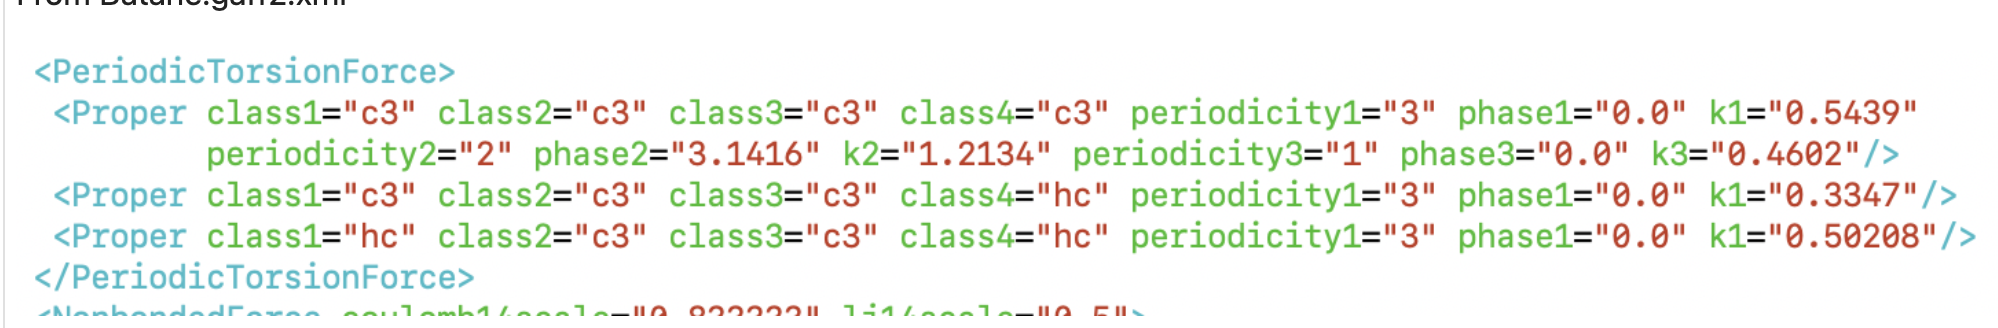

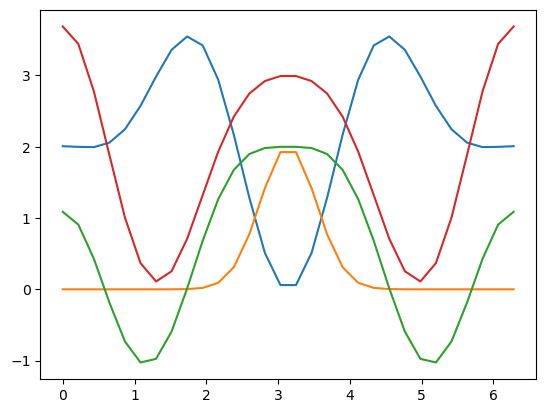

In [ ]:
###SOLUTION#####

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms


def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

plt.plot(rad_ang,CCCC_e)

#We want to mimic a gaussian potential that adds potential energy when the CCCC diehdral = pi = 180 degrees
#We can think of this as approximating a guassian center at theta= 180
###Now we define a gaussian function that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#Here is what we want our dihedral correction to look like:

gauss_cor = gauss(rad_ang, 2, np.pi, np.pi/8)
plt.plot(rad_ang,gauss_cor)

#Here I come up with a correction that should have the desired effect:

def TorsionCorrection(angle):
 e1=calc_torsion_energy(angle,-1,1,0)
 e2=calc_torsion_energy(angle,1,2,0)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

torsion_cor=TorsionCorrection(rad_ang)

plt.plot(rad_ang,torsion_cor)

def correctedCCCC(angle):
#  e1=calc_torsion_energy(angle,0.4602,1,0)
#  e2=calc_torsion_energy(angle,1.2134,2,3.1416)
#  e3=calc_torsion_energy(angle,0.5439,3,0)
 e4=calc_torsion_energy(angle,-0.2,1,0)
 e5=calc_torsion_energy(angle,1.5,2,0)
 e6=calc_torsion_energy(angle,0.5439,3,0)
 return e4+e5+e6

new_torsion=correctedCCCC(rad_ang)

plt.plot(rad_ang,new_torsion)

***WEEK 2 Homework Problem #2 Attempt to run a new MD Simulation with your modified torsion potential***

Once you have made a torsion correction you like make a new force field file 'butane.gaff2.cor1.xml'.

Run a new simulation with this force field and compare the dihedral distributions 

In [ ]:
#RUN NEW MD SIMULATION HERE#
forcefield_file_name = datadir+'butane.gaff2-cor1.xml'
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

print('Running Production...')

# Begin timer

import time as time

tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.XTCReporter(os.path.join(workdir, "butane_sim-cor1.xtc"),100))
                
# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/data/butane.pdb
/Users/jackmcmahon/Development/CHEM 101.6/Exercise1/data/butane.gaff2-cor1.xml
Minimizing...
Potential energy before minimization is 8.79752869145703 kJ/mol
Potential energy after minimization is 8.295271703179644 kJ/mol
Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,36.230634468838446,232.7283272071347
2000,58.91365402711256,220.65779964804193


Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,34.49572205729998,261.969811556099,0
500000,999.9999999901769,44.32143495144612,291.5052436646175,1.46e+04
750000,1499.9999999783536,37.51381233002577,220.3176700327308,1.46e+04
1000000,1999.9999999665301,41.57050504646661,363.40259080580734,1.44e+04
1250000,2499.9999999547067,38.061831583645855,305.74959801659537,1.46e+04
1500000,2999.9999999428833,38.42217429101477,367.9803081058954,1.45e+04
1750000,3499.99999993106,46.88562187829578,218.47399086168417,1.4e+04
2000000,3999.9999999192364,38.38397735263981,92.2559492040799,1.39e+04
2250000,4499.9999999992715,35.48005024494111,347.1935584432672,1.41e+04
2500000,5000.000000101135,49.58385309066934,342.98596750444216,1.42e+04
2750000,5500.000000202998,34.07203947528224,289.69294027911457,1.44e+04
3000000,6000.000000304862,41.34791454545051,370.5657666220688,1.45e+04
3250000,6500.000000406725,53.17893747134704,

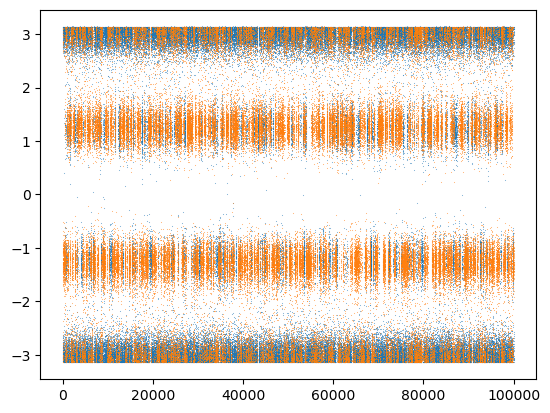

<Figure size 640x480 with 0 Axes>

In [ ]:
#Compare New Dihedral Distribution HERE)


traj_cor1 = md.load(os.path.join(workdir, "butane_sim-cor1.xtc"), top=PDB_file_name)
traj = md.load(os.path.join(workdir, "butane_sim.dcd"), top=PDB_file_name)
CCCC_index=[10,7,4,0]

CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
CCCC_torsion_cor1=md.compute_dihedrals(traj_cor1, [CCCC_index])
plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
plt.plot(CCCC_torsion_cor1,marker='x',markersize=.1,linewidth=0)
plt.show()
plt.clf()

plt.hist(CCCC_torsion,bins=100,histtype='step',label="Original")
plt.hist(CCCC_torsion_cor1,bins=100,histtype='step',label="Corrected")
plt.legend()
plt.show()
plt.clf()



**WEEK 2 Homework Problem #3 Plot the LJ and Coulumb Forcefield Potentials for 3 types of atom pairs**

#CHECK THE COMBINATION RULES USED FOR OPENMM##


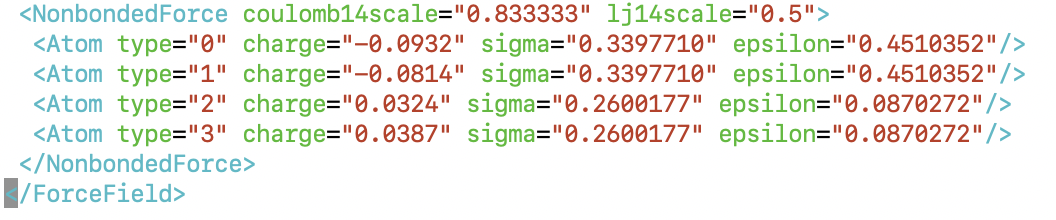




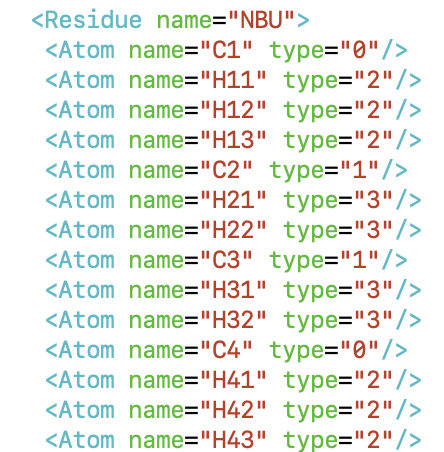

In [ ]:
#Plot LJ and Couloumb Potentionals Here

In [ ]:
# LJ
def LJ(q1,q2,r,ep):

In [ ]:
# Couloumb
def couloumb_potential(q1,q2,r,ep):
